In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

# 1. Load metadata

In [2]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("../datasets/multi_table_demo/metadata.json")

print(metadata)

tables:
{'table1': {'columns': {'id1': {'type': 'id'}, 'name1': {'type': 'categorical'}, 'age1': {'type': 'numerical'}, 'id12': {'type': 'id'}, 'id13': {'type': 'id'}}, 'primary_key': 'id1'}, 'table2': {'columns': {'id21': {'type': 'id'}, 'name2': {'type': 'categorical'}, 'age2': {'type': 'numerical'}}, 'primary_key': 'id21'}, 'table3': {'columns': {'id31': {'type': 'id'}, 'name3': {'type': 'categorical'}, 'age3': {'type': 'numerical'}}, 'primary_key': 'id31'}}
relationships:
[{'parent_table_name': 'table1', 'child_table_name': 'table2', 'parent_foreign_key': 'id12', 'child_primary_key': 'id21'}, {'parent_table_name': 'table1', 'child_table_name': 'table3', 'parent_foreign_key': 'id13', 'child_primary_key': 'id31'}]


# 2. Load data

In [3]:
import pandas as pd

data = {
    "table1": pd.read_csv("../datasets/multi_table_demo/table1.csv"),
    "table2": pd.read_csv("../datasets/multi_table_demo/table2.csv"),
    "table3": pd.read_csv("../datasets/multi_table_demo/table3.csv")
}

merged_data = pd.merge(pd.merge(data["table1"], data["table2"], left_on="id12", right_on="id21"), data["table3"], left_on="id13", right_on="id31")
merged_data.head(10)

,id1,name1,age1,id12,id13,id21,name2,age2,id31,name3,age3
0,0,tha,28,0,0,0,VQK,42,0,iQw,44
1,50,mTL,32,10,0,10,ieg,46,0,iQw,44
2,20,xRJ,43,0,20,0,VQK,42,20,rHZ,35
3,70,Iai,34,10,20,10,ieg,46,20,rHZ,35
4,40,kiJ,29,0,40,0,VQK,42,40,XeK,23
5,90,wOF,48,10,40,10,ieg,46,40,XeK,23
6,60,fuB,28,0,10,0,VQK,42,10,iRh,27
7,10,cRB,22,10,10,10,ieg,46,10,iRh,27
8,80,AWi,42,0,30,0,VQK,42,30,llU,20
9,30,sxK,24,10,30,10,ieg,46,30,llU,20


# 3. Data Conversion

In [4]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# 4. Data synthesizer

In [15]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer
from relgen.utils.enum_type import SynthesisMethod

synthesizer = MADESynthesizer(dataset, method=SynthesisMethod.MULTI_MODEL)
# synthesizer = MADESynthesizer(dataset, method=SynthesisMethod.SINGLE_MODEL)
synthesizer.fit(data)

table table1 start training
epoch 0: train loss 19.745, time cost 0.018s
epoch 1: train loss 19.628, time cost 0.015s
epoch 2: train loss 19.531, time cost 0.014s
epoch 3: train loss 19.544, time cost 0.015s
epoch 4: train loss 19.252, time cost 0.013s
epoch 5: train loss 19.197, time cost 0.012s
epoch 6: train loss 19.384, time cost 0.013s
epoch 7: train loss 18.840, time cost 0.011s
epoch 8: train loss 18.979, time cost 0.011s
epoch 9: train loss 19.035, time cost 0.011s
epoch 10: train loss 18.502, time cost 0.011s
epoch 11: train loss 18.815, time cost 0.010s
epoch 12: train loss 18.332, time cost 0.011s
epoch 13: train loss 18.943, time cost 0.012s
epoch 14: train loss 18.501, time cost 0.011s
epoch 15: train loss 18.151, time cost 0.010s
epoch 16: train loss 18.649, time cost 0.009s
epoch 17: train loss 18.773, time cost 0.009s
epoch 18: train loss 18.958, time cost 0.010s
epoch 19: train loss 18.734, time cost 0.009s
epoch 20: train loss 17.815, time cost 0.010s
epoch 21: train 

epoch 77: train loss 21.510, time cost 0.019s
epoch 78: train loss 20.442, time cost 0.022s
epoch 79: train loss 18.072, time cost 0.020s
epoch 80: train loss 17.146, time cost 0.019s
epoch 81: train loss 17.963, time cost 0.020s
epoch 82: train loss 15.518, time cost 0.022s
epoch 83: train loss 16.409, time cost 0.022s
epoch 84: train loss 16.744, time cost 0.020s
epoch 85: train loss 11.865, time cost 0.019s
epoch 86: train loss 18.797, time cost 0.018s
epoch 87: train loss 19.111, time cost 0.019s
epoch 88: train loss 18.556, time cost 0.012s
epoch 89: train loss 16.368, time cost 0.018s
epoch 90: train loss 19.634, time cost 0.020s
epoch 91: train loss 13.256, time cost 0.022s
epoch 92: train loss 21.828, time cost 0.020s
epoch 93: train loss 13.460, time cost 0.019s
epoch 94: train loss 13.641, time cost 0.016s
epoch 95: train loss 16.798, time cost 0.015s
epoch 96: train loss 17.010, time cost 0.017s
epoch 97: train loss 17.550, time cost 0.014s
epoch 98: train loss 13.949, time 

# 5. Generate data

In [6]:
sampled_data = synthesizer.sample()

merged_sampled_data = pd.merge(pd.merge(sampled_data["table1"], sampled_data["table2"], left_on="id12", right_on="id21"), sampled_data["table3"], left_on="id13", right_on="id31")
merged_sampled_data.head(10)

,id1,name1,age1,id12,id13,id21,name2,age2,id31,name3,age3
0,0,AWi,32,2,46,2,VQK,28,46,Svg,43
1,1,zri,40,57,71,57,QJT,38,71,wOD,42
2,2,RfA,34,3,50,3,VQK,42,50,WKc,49
3,4,jmX,36,3,41,3,VQK,42,41,Jcf,35
4,3,Zvq,20,11,58,11,vZf,38,58,oMN,24
5,15,JEO,27,11,86,11,vZf,38,86,rHZ,22
6,5,mNo,37,85,1,85,WyC,38,1,Inc,24
7,6,dnp,27,69,45,69,VQK,46,45,Svg,22
8,7,cRB,22,50,43,50,ieg,46,43,iRh,40
9,8,cRB,33,72,8,72,rdJ,50,8,vKq,43


# 6. Evaluate the generated data

In [13]:
from relgen.evaluator import Evaluator

evaluator = Evaluator(merged_data, merged_sampled_data)

In [8]:
evaluator.eval_fidelity()

{'JS_distance Mean': 0.2775140921493952,
 'JS_distance Std': 0.13538881125085894,
 'JS_distance Max': 0.4483823288578953,
 'JS_distance Min': 0.11725865610441584,
 'WD_distance Mean': 14.887500000000001,
 'WD_distance Std': 14.524992039584738,
 'WD_distance Max': 33.230000000000004,
 'WD_distance Min': 0.0,
 'Diff.Corr Mean': 0.18353954413944662,
 'Discriminator Measure': 0.25}

In [9]:
evaluator.eval_privacy()

{'DCR 5 percentile': 0.07592323476649564,
 'NNDR 5 percentile': 0.5337835288957716}

In [10]:
evaluator.eval_diversity()

{'Sampling Diversity': 0.39}

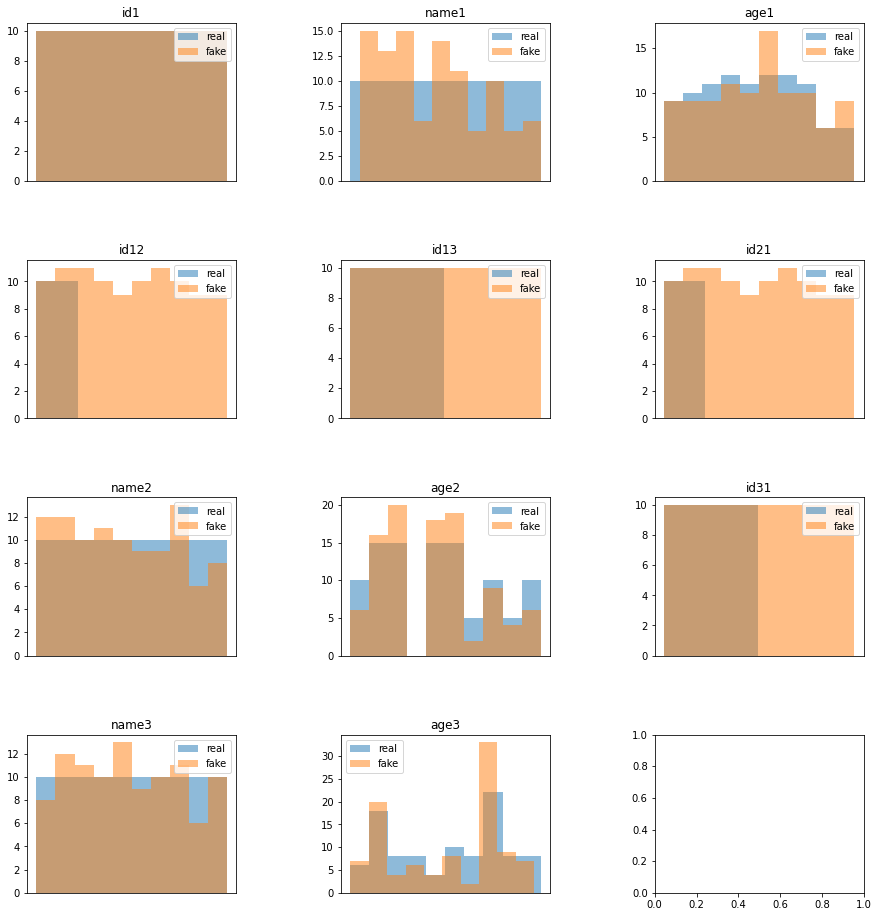

In [14]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
evaluator.eval_histogram()

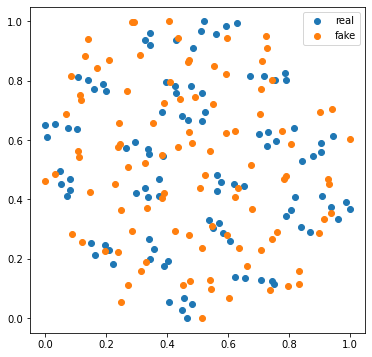

In [12]:
evaluator.eval_tsne()